In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

import random

In [43]:
# 데이터 불러오기
plant1 = pd.read_csv('plant1_train_merge.csv')
plant2 = pd.read_csv('plant2_train_merge.csv')
test =  pd.read_csv('test.csv', index_col=0)

# 결측행 제거
plant1_notnull = plant1.dropna(how='any')
plant2_notnull = plant2.dropna(how='any')

In [45]:
# 1, 0 비율
print('loc1 value counts\n')
print(plant1['plant1_train.cond_loc1'].value_counts())
print(plant1_notnull['plant1_train.cond_loc1'].value_counts(),'\n\n')

print('loc2 value counts\n')
print(plant1['plant1_train.cond_loc2'].value_counts())
print(plant1_notnull['plant1_train.cond_loc2'].value_counts(),'\n\n')

print('loc3 value counts\n')
print(plant1['plant1_train.cond_loc3'].value_counts())
print(plant1_notnull['plant1_train.cond_loc3'].value_counts(),'\n\n')

loc1 value counts

0.0    57604
1.0      275
Name: plant1_train.cond_loc1, dtype: int64
0.0    57579
1.0      275
Name: plant1_train.cond_loc1, dtype: int64 


loc2 value counts

0.0    58142
1.0      487
Name: plant1_train.cond_loc2, dtype: int64
0.0    57369
1.0      485
Name: plant1_train.cond_loc2, dtype: int64 


loc3 value counts

0.0    57959
1.0      645
Name: plant1_train.cond_loc3, dtype: int64
0.0    57226
1.0      628
Name: plant1_train.cond_loc3, dtype: int64 




In [46]:
# 이슬점 함수

def dewpoint(temp, humid):
    return ((243.12 *((17.62 * temp /(243.12 + temp))
                     + np.log(humid / 100.0))) / (17.62-((17.62 * temp / (243.12 + temp)) + np.log(humid/ 100.0))))

In [48]:
# plant1 학습 데이터셋

plant1_loc1_24 = plant1.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant1_loc2_24 = plant1.iloc[:,[0,4,5,6,10,11, 13, 17,18,16]]
plant1_loc3_24 = plant1.iloc[:,[0,7,8,9,10,11, 14, 17,18,16]]

plant1_loc1_48 = plant1.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant1_loc2_48 = plant1.iloc[:,[0,4,5,6,10,11, 13, 20,21,19]]
plant1_loc3_48 = plant1.iloc[:,[0,7,8,9,10,11, 14, 20,21,19]]

temp_df = plant1_loc1_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc1_24 = plant1_loc1_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc2_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc2_24 = plant1_loc2_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc3_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc3_24 = plant1_loc3_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')

temp_df = plant1_loc1_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc1_48 = plant1_loc1_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc2_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc2_48 = plant1_loc2_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc3_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc3_48 = plant1_loc3_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')

plant1_loc1_24.dropna(how='any', inplace=True)
plant1_loc2_24.dropna(how='any', inplace=True)
plant1_loc3_24.dropna(how='any', inplace=True)
plant1_loc1_48.dropna(how='any', inplace=True)
plant1_loc2_48.dropna(how='any', inplace=True)
plant1_loc3_48.dropna(how='any', inplace=True)

plant1_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']

plant1_24 = pd.concat([plant1_loc1_24, plant1_loc2_24, plant1_loc3_24])
plant1_48 = pd.concat([plant1_loc1_48, plant1_loc2_48, plant1_loc3_48])

# plant2 학습 데이터셋

plant2_loc1_24 = plant2.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant2_loc2_24 = plant2.iloc[:,[0,1,2,3,10,11, 13, 17,18,16]]
plant2_loc3_24 = plant2.iloc[:,[0,1,2,3,10,11, 14, 17,18,16]]

plant2_loc1_48 = plant2.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant2_loc2_48 = plant2.iloc[:,[0,1,2,3,10,11, 13, 20,21,19]]
plant2_loc3_48 = plant2.iloc[:,[0,1,2,3,10,11, 14, 20,21,19]]

temp_df = plant2_loc1_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc1_24 = plant2_loc1_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc2_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc2_24 = plant2_loc2_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc3_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc3_24 = plant2_loc3_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')

temp_df = plant2_loc1_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc1_48 = plant2_loc1_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc2_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc2_48 = plant2_loc2_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc3_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc3_48 = plant2_loc3_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')

plant2_loc1_24.dropna(how='any', inplace=True)
plant2_loc2_24.dropna(how='any', inplace=True)
plant2_loc3_24.dropna(how='any', inplace=True)
plant2_loc1_48.dropna(how='any', inplace=True)
plant2_loc2_48.dropna(how='any', inplace=True)
plant2_loc3_48.dropna(how='any', inplace=True)

plant2_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']

# LOC 병합
plant2_24 = pd.concat([plant2_loc1_24, plant2_loc2_24, plant2_loc3_24])
plant2_48 = pd.concat([plant2_loc1_48, plant2_loc2_48, plant2_loc3_48])


# plant 병합
plant_24 = pd.concat([plant1_24, plant2_24], ignore_index=True)
plant_24 = plant_24.sort_values('today').reset_index(drop=True)

plant_48 = pd.concat([plant1_48, plant2_48], ignore_index=True)
plant_48 = plant_48.sort_values('today').reset_index(drop=True)

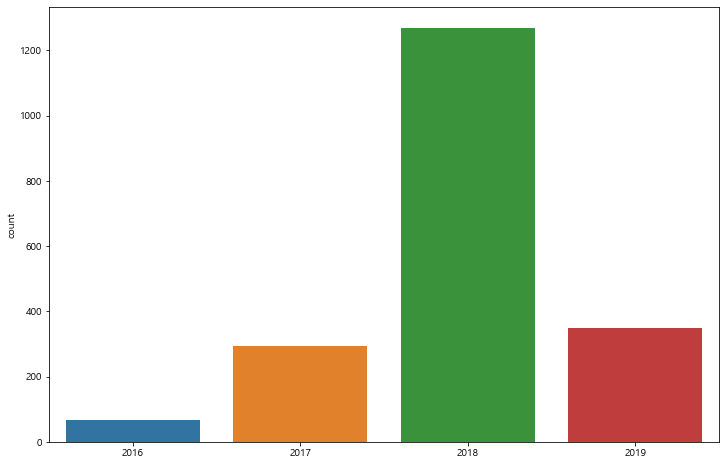

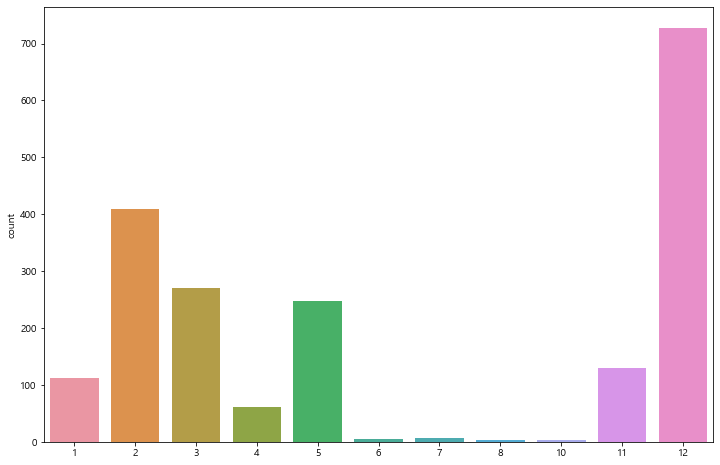

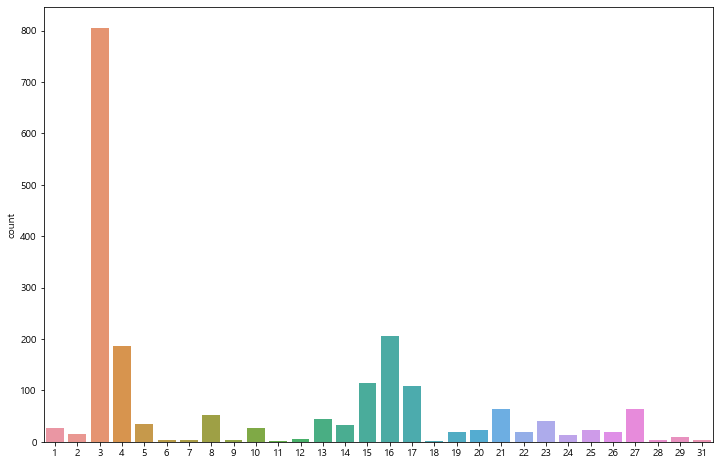

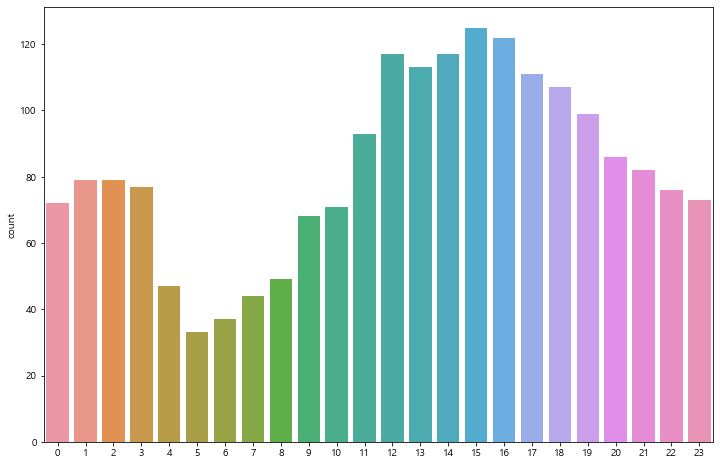

In [177]:
# 날짜별 EDA

test = plant_24.iloc[:,:7]
test['today'] = test['today'].astype('datetime64')

years = []
months = []
days = []
hours = []
for i in test[test['target'] == 1]['today'] :
    hours.append(i.hour)
    months.append(i.month)
    days.append(i.day)
    years.append(i.year)
    
plt.figure(figsize=(12,8))
sns.countplot(years)
plt.savefig('year.png')

plt.figure(figsize=(12,8))
sns.countplot(months)
plt.savefig('month.png')

plt.figure(figsize=(12,8))
sns.countplot(days)
plt.savefig('day.png')

plt.figure(figsize=(12,8))
sns.countplot(hours)
plt.savefig('hour.png')

# DNN 모델

In [195]:
from keras_tqdm import TQDMNotebookCallback
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

from keras.models import load_model
from tensorflow.keras.models import load_model

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report, confusion_matrix

## 24h 모델

In [73]:
x = plant_24.iloc[:,[1,2,3,4,5,7,8]]
y = plant_24.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

In [74]:
print(train_x.shape)
print(train_y.shape)

(241819, 7)
(241819, 5)


In [75]:
# callback 함수

es = EarlyStopping(patience=30)
tqdm = TQDMNotebookCallback()

In [178]:
# DNN 모델
model = Sequential()

model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=500, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [61]:
# model.save('24h(2.434).h5')

## 48h 모델

In [192]:
x = plant_48.iloc[:,[1,2,3,4,5,7,8]]
y = plant_48.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

print(train_x.shape)  # (240931, 7)
print(train_y.shape)  # (240931, 5)

(240931, 7)
(240931, 5)


In [193]:
# callback 함수
es = EarlyStopping(patience=30)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=500, batch_size=2048, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [112]:
# model.save('48h(2.47).h5')

# 예측모델 load

In [194]:
# 모델 load
model_24 = load_model('24h(2.434).h5')
model_48 = load_model('48h(2.47).h5')

# 결로 예측 모델

In [349]:
condensation_data = plant_24.iloc[:,1:7]
condensation_data = condensation_data.reset_index(drop=True)
condensation_data = condensation_data[['temp_in','hum_in','temp_coil','target']]

# condensation_data.to_csv('condensation_data.csv')

condensation_data['dewpoint'] = dewpoint(condensation_data['temp_in'], condensation_data['hum_in'])
condensation_data['diff'] = condensation_data['temp_in'] - condensation_data['temp_coil']

condensation_data['dew_diff'] = np.where(
    condensation_data['dewpoint']>condensation_data['temp_coil'],
    np.where(condensation_data['dewpoint']<condensation_data['temp_in'],
             1,0),0)

nag = condensation_data[condensation_data['target'] == 1]  # 1977
pos_index = random.sample(list(condensation_data[condensation_data['target'] == 0].index), 4023)
pos = condensation_data.iloc[pos_index, :]

condensation_sample = pd.concat([nag,pos])
condensation_sample = condensation_sample.sample(frac=1).reset_index(drop=True)

condensation_data = condensation_data.iloc[:,[0,1,2,4,5,6,3]]

condensation_data_x = condensation_sample.iloc[:,[0,1,2,3,4,5]]
condensation_data_y = condensation_sample.iloc[:,[6]]

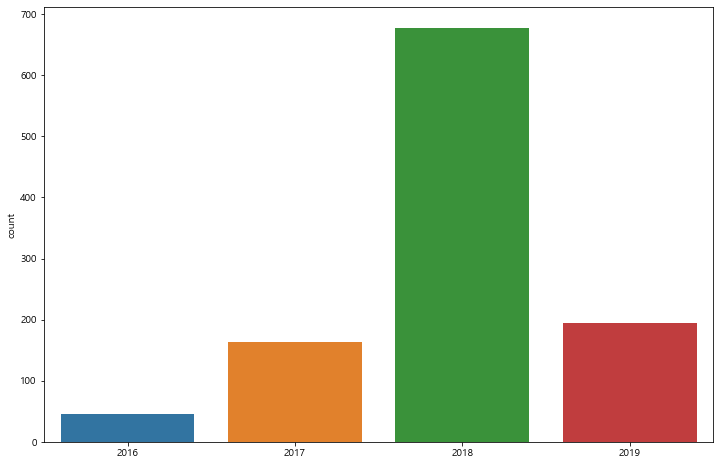

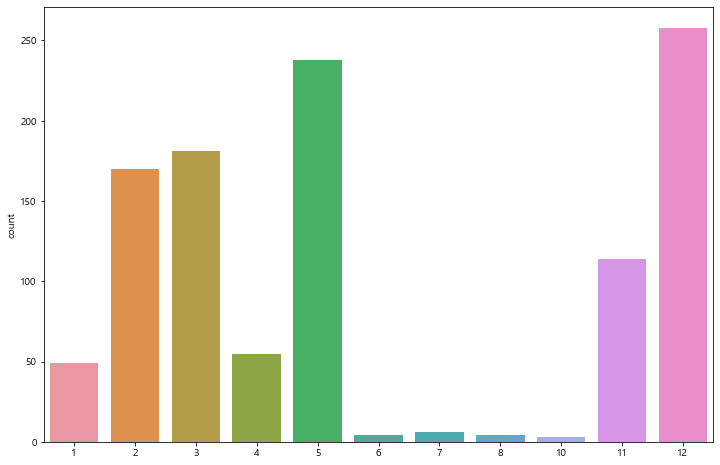

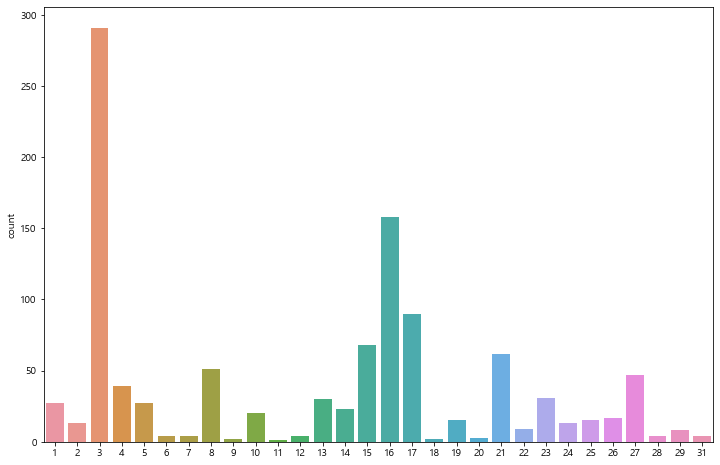

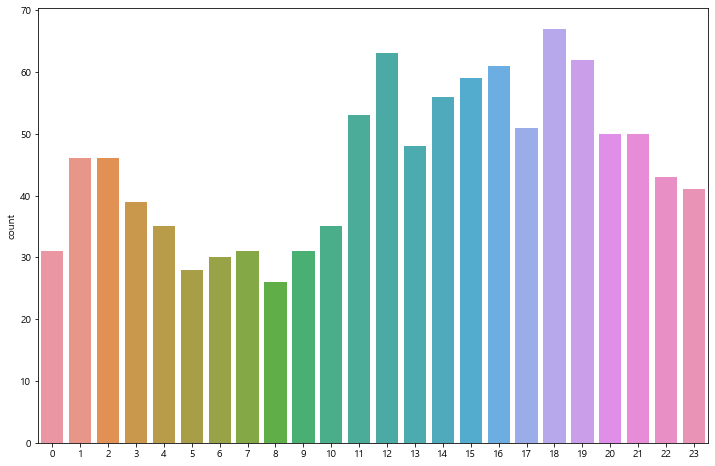

In [375]:
error = condensation_data[condensation_data['dewpoint'] < condensation_data['temp_coil']]
error = error[error['target'] == 1]

error = plant_24.iloc[error.index,:]
error['today'] = error['today'].astype('datetime64')

years = []
months = []
days = []
hours = []
for i in error['today'] :
    hours.append(i.hour)
    months.append(i.month)
    days.append(i.day)
    years.append(i.year)
    
plt.figure(figsize=(12,8))
sns.countplot(years)
# plt.savefig('year.png')

plt.figure(figsize=(12,8))
sns.countplot(months)
# plt.savefig('month.png')

plt.figure(figsize=(12,8))
sns.countplot(days)
# plt.savefig('day.png')

plt.figure(figsize=(12,8))
sns.countplot(hours)
# plt.savefig('hour.png')

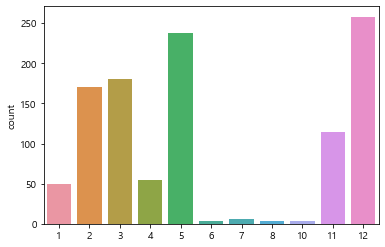

In [374]:
sns.countplot(months)

In [337]:
# 정규화

scaler = MinMaxScaler()
condensation_data_x_n = scaler.fit_transform(condensation_data_x)

In [338]:
train_x, test_x, train_y, test_y = train_test_split(condensation_data_x_n, condensation_data_y, test_size=0.3, random_state=77)  

In [339]:
def getModel():
    model = Sequential()

    model.add(Dense(units=32, activation=None))
    model.add(LeakyReLU())
    model.add(Dense(units=32, activation=None))
    model.add(LeakyReLU())
    model.add(Dense(units=32, activation=None))
    model.add(Dropout(0.4))
    model.add(LeakyReLU())
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    
    return model
    

In [343]:
# callback 함수

es = EarlyStopping(patience=50)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=32, activation='linear', input_dim=6))
model.add(Dropout(0.4))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=128, activation='linear'))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='linear'))
model.add(Dense(units=256, activation='linear'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])

hist = model.fit(train_x, train_y, epochs=1000, batch_size=210, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

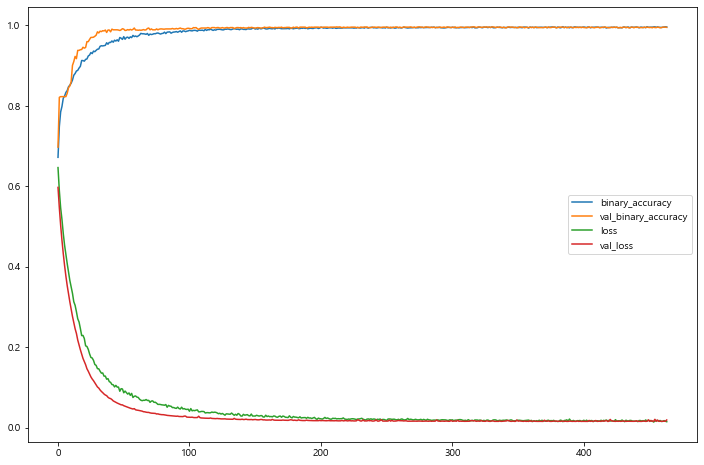

In [344]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['binary_accuracy'], label='binary_accuracy')
plt.plot(hist.history['val_binary_accuracy'], label='val_binary_accuracy')

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()

plt.show()

In [345]:
pred_y = model.predict(test_x)
pred_y = pred_y.reshape(-1,)
pred_y = pred_y.astype('int')

test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))

print(confusion_matrix(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1208
         1.0       1.00      0.46      0.63       592

    accuracy                           0.82      1800
   macro avg       0.90      0.73      0.76      1800
weighted avg       0.86      0.82      0.80      1800

[[1208    0]
 [ 319  273]]


In [ ]:
'''              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1208
         1.0       1.00      0.46      0.63       592

    accuracy                           0.82      1800
   macro avg       0.90      0.73      0.76      1800
weighted avg       0.86      0.82      0.80      1800

[[1208    0]
 [ 319  273]]]'''